
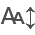

In [1]:
import geopandas as gpd
import pandas as pd
from pathlib import Path
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)

In [2]:
zoning_current = {
    "INSTITUTIONAL": ["CAMP"],
    "OFFICE": ["CAMP"],
    "GENERAL INDUSTRIAL": ["ML"],
    "BUSINESS": ["COMM"],
    "MIXED USE": ["CAC", "RAC", "IMU"],
    "NEIGHBORHOOD 1": ["N1"],
    "LIGHT INDUSTRIAL": ["IMU"],
    "MIXED USE RESIDENTIAL": ["CAC", "RAC", "IMU"],
    "MULTI-FAMILY": ["N2"],
    "TRANSIT-ORIENTED": ["CAC", "RAC"],
    "SINGLE FAMILY": ["N1"],
    "NEIGHBORHOOD 2": ["N2"],
    "BUSINESS-DISTRIBUTION": ["ML"],
    "HEAVY INDUSTRIAL": ["ML"],
    "RESEARCH": ["CAMP"],
    "URBAN RESIDENTIAL": ["CAC", "RAC", "NC"],
    "COMMERCIAL CENTER": ["CAC", "RAC", "NC", "COMM"],
    "UPTOWN MIXED USE": ["RAC"],
    "MANUFACTURED HOME": ["N1"],
    "COMMUNITY ACTIVITY CENTER": ["CAC"],
    "INNOVATION MIXED USE": ["IMU"],
    "NEIGHBORHOOD CENTER": ["NC"],
    "TRANSIT ORIENTED": ["CAC", "RAC"],
    "Manufacturing and Logistics": ["ML"],
    "BUSINESS PARK": ["CAMP"],
    "COMMERCIAL GENERAL": ["COMM"],
    "MANUFACTURING AND LOGISTICS": ["ML"],
    "TRANSIT ORIENTED DEVELOPMENT": ["CAC", "RAC"],
    "Business": ["COMM"],
    "MIXED USE DISTRICT": ["CAC", "RAC", "IMU"],
    "Community Activity Center": ["CAC"],
    "REGIONAL ACTIVITY CENTER": ["RAC"],
    "MULTI-FAMILY RESIDENTIAL": ["N2"],
    "INNOVATION MXED USE": ["IMU"],
    "INSTITUTION": ["CAMP"],
    "MIXED RESIDENTIAL": ["N2", "NC", "CAC", "RAC"],
    "COMMERCIAL": ["COMM"],
    "GENERAL COMMERCIAL": ["COMM"],
    "Light Industrial": ["IMU"],
    "RESORT RESIDENTIAL": ["N1"],
    "NEIGHBORHOOD SERVICES": ["NC"],
    "MIXED USE DEVELOPMENT": ["CAC", "RAC", "IMU", "NC"],
    "INSTITUTIONAL CAMPUS": ["CAMP"],
    "SINGLE FAMILY RESIDENTIAL": ["N1"],
    "TRANSIT ORIENTED": ["CAC", "RAC"]
}
zoning_current = {key: value[0] for key, value in zoning_current.items()}

zoning_2040 = {
    "Community Activity Center": "CAC",
    "Commercial": "COMM",
    "Innovation Mixed-Use": "IMU",
    "Manufacturing & Logistics": "ML",
    "Neighborhood Center": "NC",
    "Parks & Preserves": "PP",
    "Regional Activity Center": "RAC",
    "Neighborhood 1": "N1",
    "Neighborhood 2": "N2",
    "Campus": "CAMP"
}

zoning_2040

{'Community Activity Center': 'CAC',
 'Commercial': 'COMM',
 'Innovation Mixed-Use': 'IMU',
 'Manufacturing & Logistics': 'ML',
 'Neighborhood Center': 'NC',
 'Parks & Preserves': 'PP',
 'Regional Activity Center': 'RAC',
 'Neighborhood 1': 'N1',
 'Neighborhood 2': 'N2',
 'Campus': 'CAMP'}

In [18]:
zoning_shp_path = Path("/app/data/shp/Current Zoning/Zoning.shp")
zoning_current_gdf = gpd.read_file(zoning_shp_path)
zoning_current_gdf

OBJECTID ZonePetiti   ZoneDes SPA Overlay  RezoneDate  \
0        65062   2004-024  INST(CD)  no    none  2004-05-17   
1        65063       None       OFC  no    none  2023-06-01   
2        65064   2023-030   I-2(CD)  no    none  2023-09-18   
3        65065   1977-037   B-1(CD)  no    none  1977-11-21   
4        65065   1977-037   B-1(CD)  no    none  1977-11-21   
...        ...        ...       ...  ..     ...         ...   
5453     70512   2022-215   I-1(CD)  no    none  2023-04-17   
5454     70513       None    TOD-UC  no    none  2023-06-01   
5455     70514       None      N1-C  no    none  2023-06-01   
5456     70515       None        CG  no    none  2023-06-01   
5457     70516   1996-058   B-D(CD)  no    none  1996-09-16   

                  ZoneClass  \
0             INSTITUTIONAL   
1                    OFFICE   
2        GENERAL INDUSTRIAL   
3                  BUSINESS   
4                  BUSINESS   
...                     ...   
5453       LIGHT INDUSTRIAL   
5454       TRANSIT-ORIENTED   
5455         NEIGHBORHOOD 1   
5456               BUSINESS   
5457  BUSINESS-DISTRIBUTION   

                                              Hyperlink  \
0                                                  None   
1                                                  None   
2     https://www.charlottenc.gov/Growth-and-Develop...   
3                                                  None   
4                                                  None   
...                                                 ...   
5453                                               None   
5454                                               None   
5455                                               None   
5456                                               None   
5457                                               None   

                                             applicatio  \
0     <a href="https://gis.charlottenc.gov/Public/Pl...   
1                                                  None   
2                                                  None   
3                                                  None   
4     <a href="https://gis.charlottenc.gov/public/Pl...   
...                                                 ...   
5453                                               None   
5454                                               None   
5455                                               None   
5456                                               None   
5457  <a href="https://gis.charlottenc.gov/public/Pl...   

                                               SitePlan  \
0     <a href="https://gis.charlottenc.gov/Public/Pl...   
1                                                  None   
2     <a href="https://gis.charlottenc.gov/public/Pl...   
3                                                  None   
4     <a href="https://gis.charlottenc.gov/public/Pl...   
...                                                 ...   
5453  <a href="https://gis.charlottenc.gov/public/Pl...   
5454                                               None   
5455                                               None   
5456                                               None   
5457  <a href="https://gis.charlottenc.gov/public/Pl...   

                                             administra    SHAPESTAre  \
0     <a href="https://gis.charlottenc.gov/Public/Pl...  3.130837e+05   
1                                                  None  6.387971e+05   
2                                                  None  5.493968e+06   
3                                                  None  1.122155e+04   
4                                                  None  1.122155e+04   
...                                                 ...           ...   
5453                                               None  4.016260e+05   
5454                                               None  3.384419e+05   
5455                                               None  4.751855e+05   
5456               

In [19]:
zone_desc_df = pd.DataFrame(zoning_current_gdf['ZoneDes'].unique(), columns=['ZoneDesc'])
zone_desc_df

ZoneDesc
Loading ITables v2.0.1 from the init_notebook_mode cell... (need help?)


In [20]:
multi_family_zone_by_right_desc = ["N1-F", "N2-B", "N2-C", "RC", "IMU", "NC", "CAC-1", "CAC-2", "RAC", "UC", "UE", "TOD-UC", "TOD-NC", "TOD-CC", "TOD-TR"]
multi_family_by_right_gdf = zoning_current_gdf[zoning_current_gdf['ZoneDes'].isin(multi_family_zone_by_right_desc)]
multi_family_by_right_gdf

OBJECTID ZonePetiti ZoneDes SPA Overlay  RezoneDate  \
8        65069       None      NC  no    none  2023-06-01   
26       65087       None    N2-B  no    none  2023-06-01   
40       65101       None    N2-B  no    none  2023-06-01   
47       65108       None  TOD-CC  no    none  2023-06-01   
60       65121       None    N2-B  no    none  2023-06-01   
...        ...        ...     ...  ..     ...         ...   
5409     70468       None    N2-B  no    none  2023-06-01   
5415     70474   2023-006  TOD-CC  no    none  2023-08-21   
5435     70494   2023-149  TOD-UC  no    none  2024-03-18   
5445     70504       None    N2-B  no    none  2023-06-01   
5454     70513       None  TOD-UC  no    none  2023-06-01   

                         ZoneClass  \
8                         BUSINESS   
26                  NEIGHBORHOOD 2   
40                  NEIGHBORHOOD 2   
47                TRANSIT-ORIENTED   
60                  NEIGHBORHOOD 2   
...                            ...   
5409                NEIGHBORHOOD 2   
5415              TRANIST ORIENTED   
5435  TRANSIT ORIENTED DEVELOPMENT   
5445                NEIGHBORHOOD 2   
5454              TRANSIT-ORIENTED   

                                              Hyperlink applicatio SitePlan  \
8                                                  None       None     None   
26                                                 None       None     None   
40                                                 None       None     None   
47                                                 None       None     None   
60                                                 None       None     None   
...                                                 ...        ...      ...   
5409                                               None       None     None   
5415  https://www.charlottenc.gov/Growth-and-Develop...       None     None   
5435  https://www.charlottenc.gov/Growth-and-Develop...       None     None   
5445                                               None       None     None   
5454                                               None       None     None   

     administra    SHAPESTAre   SHAPESTLen  \
8          None  4.912261e+05  6091.959846   
26         None  2.597697e+04   725.537314   
40         None  4.990545e+04   911.137621   
47         None  1.679644e+05  2241.134287   
60         None  8.899328e+05  4787.923478   
...         ...           ...          ...   
5409       None  2.325992e+05  1922.893260   
5415       None  1.974778e+05  1849.872441   
5435       None  9.120127e+03   670.487862   
5445       None  2.043738e+06  6348.399182   
5454       None  3.384419e+05  3207.774817   

                                               geometry  
8     POLYGON ((1445890.375 550445.250, 1445910.500 ...  
26    POLYGON ((1452796.267 536230.766, 1452806.833 ...  
40    POLYGON ((1445918.809 562462.124, 1445649.625 ...  
47    POLYGON ((1438910.766 510852.623, 1438910.750 ...  
60    POLYGON ((1441422.250 492432.500, 1441397.125 ...  
...                                                 ...  
5409  POLYGON ((1446848.875 525468.500, 1446852.000 ...  
5415  POLYGON ((1438210.515 522522.080, 1438183.349 ...  
5435  POLYGON ((1445596.050 541334.884, 1445595.770 ...  
5445  POLYGON ((1489794.380 582098.481, 1489628.743 ...  
5454  POLYGON ((1459971.037 552062.940, 1460006.606 ...  

[665 rows x 14 columns]